### **GRIP @ The Sparks Foundation**

#### **Computer Vision and IoT**

### **Task 2 : Color Identification in Images**

#### **Data Science and Business Analytics Intern**

### **Name : Meka Ujwala**

#### **In this task I tried to implement an image color detector which identifies all the colors in an image.**

In [1]:
# Importing th required libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import glob
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
from sklearn.cluster import KMeans
%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (194, 259, 3)


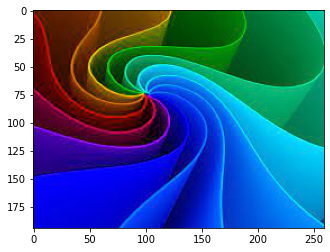

In [2]:
# Working with OpenCV
image = cv2.imread('image1.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

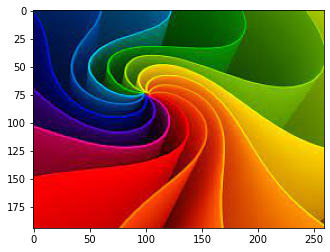

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

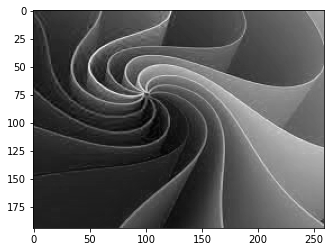

In [4]:
# Gray scaling
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

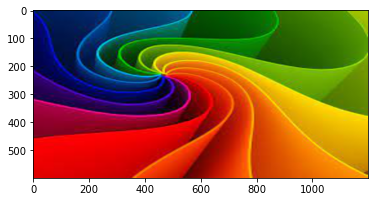

In [5]:
# Resizing the image
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [6]:
# RGB to Hex Conversion
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [7]:
# Reading image in RGB color space
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [8]:
# Getting colors from an image
def get_colors(image,number_of_colors,show_chart):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)
    center_colors = clf.cluster_centers_
   # We will get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    return rgb_colors

[array([ 11.35264021,  73.1389308 , 142.17297475]),
 array([224.42462514,   9.72079728,   6.37244354]),
 array([233.17004145, 179.81354896,   5.54209418]),
 array([ 23.30866249, 101.51958594,   6.02925633]),
 array([ 95.33654942, 156.10406579,   4.86243236]),
 array([12.88624381, 17.69421132, 79.98455993]),
 array([142.43329024,   5.76902865,  29.27296993]),
 array([230.46110266,  88.70937874,   4.24319337])]

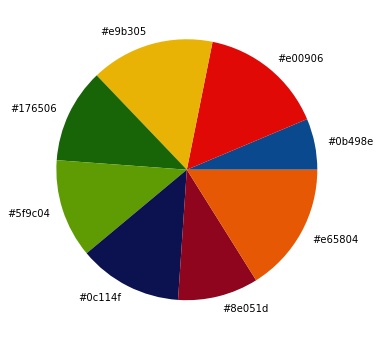

In [9]:
# Calling the function
get_colors(get_image('image1.jpg'),8,True)

In [10]:
IMAGE_DIRECTORY = 'images'
COLORS = {'GREEN': [0, 128, 0],'BLUE': [0, 0, 128],'YELLOW': [255, 255, 0]}
images = []
for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

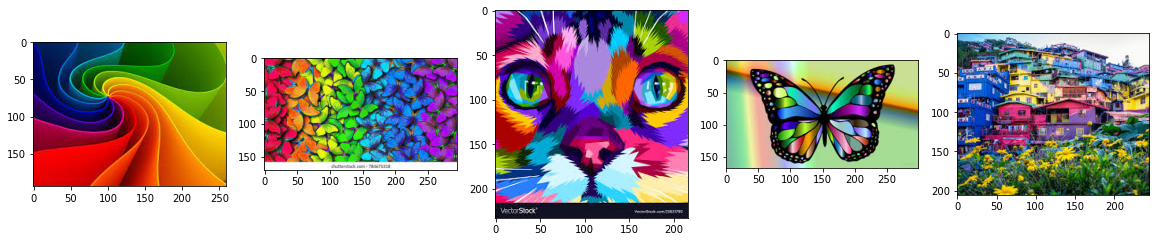

In [11]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [12]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))
    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    return select_image

In [13]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    for i in range(len(images)):
        selected = match_image_by_color(images[i],color,threshold,colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

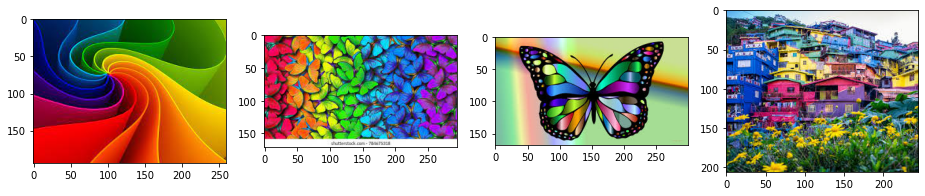

In [14]:
# Searching for GREEN
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

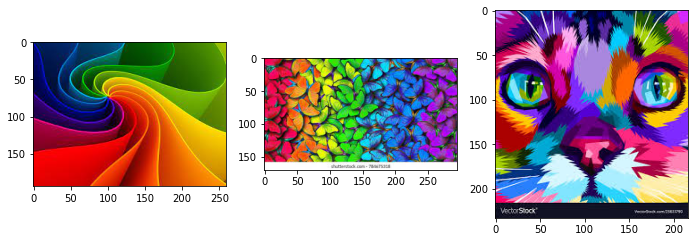

In [15]:
# Searching for BLUE
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

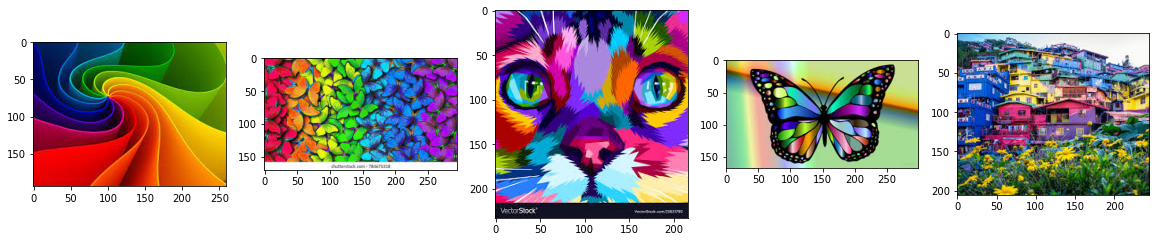

In [16]:
# Searching for YELLOW
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)